In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Maximilian Arnold,de GER,MF,Wolfsburg,de Bundesliga,0.0,1994.0,126.0,123.0,10852,120.5,0.11,0.22,0.09,0.19,0.08,0.23,0.05,0.20,61.0,44.0,72.13,12.0,19.67,65.36,3.26,14.75,38.68,12.59,0.27,65.32,0.51,0.36,0.10,33.24,149.70,70.52,0.80,0.87,0.05,0.81,0.65,38.10,0.79,3.14,0.24,1.59,1.24,0.05,0.10,0.14,1.59,0.11,0.07,0.01,0.02,0.03,0.00,5330.0,6757.0,78.88,110348.0,37219.0,1831.0,2054.0,88.98,2483.0,2835.0,87.58,933.0,1623.0,57.49,0.01,0.15,0.18,-0.05,1.64,4.61,0.84,0.22,5.35,56.08,47.60,8.14,4.56,0.15,0.90,4.86,0.23,2.92,1.76,0.89,0.02,44.23,0.33,0.56,0.00,0.45,0.00,7.67,0.00,3.9,4.9,50.59,0.20,0.01,0.00,1.29,1.90,0.01,1.13,0.95,0.00,0.02,7.32,0.96,0.95,1.63,0.66,0.81,0.17,0.78,1.74,0.96,1.03,0.27,2.76,1.97,0.02,44.35,4,0,0,0,0,4
1,1,Nathaniel Clyne,eng ENG,DF,Crystal Palace,eng Premier League,0.0,1991.0,70.0,61.0,5474,60.8,0.00,0.03,0.00,0.03,0.01,0.04,0.01,0.04,40.0,21.0,52.50,15.0,37.50,52.93,2.60,18.47,24.89,9.85,0.28,52.93,0.66,0.34,0.24,24.21,108.88,52.86,0.92,0.68,0.03,0.71,0.15,28.78,1.51,0.76,0.07,0.62,0.06,0.00,0.03,0.01,0.62,0.05,0.00,0.00,0.02,0.00,0.00,2158.0,2752.0,78.42,32659.0,13140.0,1185.0,1318.0,89.98,844.0,1053.0,80.15,93.0,245.0,37.96,0.00,0.03,0.02,0.01,0.33,2.17,0.49,0.24,2.68,45.26,36.84,8.27,0.39,0.02,0.08,1.15,7.88,0.00,0.00,0.00,0.00,35.49,0.15,1.08,0.00,0.05,0.00,0.00,0.00,-0.5,-0.5,42.82,0.10,0.00,0.00,0.38,0.30,0.00,1.02,0.84,0.00,0.00,4.28,0.54,0.71,1.46,0.71,0.61,0.15,0.77,1.31,0.54,0.89,0

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (DF) and midfielders (MF) from the 'final_player' DataFrame
defender_players = final_player[final_player['Pos'].isin(['DF'])]
newbie = newbie[newbie['Pos'].isin(['DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF'])]

# Reset the index if needed
defender_players = defender_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024=player_2024.reset_index(drop=True)

In [6]:
Theo=defender_players[defender_players['Player']=='Theo Hernández']
Theo


,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
53,125,Theo Hernández,fr FRA,DF,Milan,it Serie A,0.0,1997.0,129.0,126.0,11206,124.5,0.17,0.31,0.14,0.28,0.14,0.28,0.11,0.26,353.0,178.0,50.42,150.0,42.49,69.84,2.66,17.18,34.6,19.22,2.25,69.8,2.83,1.43,1.21,41.2,284.58,179.82,3.93,2.91,0.68,1.55,0.74,45.21,4.81,3.24,0.39,2.1,0.43,0.17,0.22,0.27,2.1,0.3,0.01,0.01,0.03,0.02,0.01,6039.0,7377.0,81.86,96009.0,32260.0,3074.0,3404.0,90.79,2217.0,2613.0,84.85,427.0,765.0,55.82,0.03,0.15,0.14,-0.01,1.4,3.27,1.22,0.39,4.36,59.25,49.28,9.81,1.94,0.09,0.58,2.91,7.08,0.72,0.06,0.57,0.0,48.5,0.17,1.32,0.0,0.43,0.0,12.24,0.0,4.0,4.2,66.08,0.27,0.02,0.01,1.07,2.1,0.14,0.81,0.84,0.02,0.01,6.36,1.13,0.58,1.4,0.82,0.49,0.09,0.65,1.11,0.46,0.9,0.23,2.21,1.36,0.08,57.39,4,0,0,4,0,0


In [7]:
Theo_2024=player_2024[player_2024['Player']=='Theo Hernández']
Theo_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
212,1129,Theo Hernández,fr FRA,DF,Milan,it Serie A,0.0,1997.0,32,31,2791,31.0,0.16,0.29,0.13,0.26,0.16,0.3,0.11,0.25,81.0,37.0,45.7,32.0,39.5,73.23,2.9,18.74,38.42,17.13,2.29,73.16,2.61,1.19,1.03,47.32,301.68,196.61,3.71,3.0,0.42,0.97,0.71,51.68,4.0,3.84,0.42,2.81,0.26,0.23,0.35,0.16,0.03,0.35,0.0,0.0,0.03,0.03,0.0,1717.0,1994.0,86.1,26200.0,9027.0,934.0,995.0,93.9,637.0,709.0,89.8,91.0,172.0,52.9,0.13,0.14,0.15,-0.01,1.42,3.32,1.29,0.39,5.35,64.32,56.06,8.13,2.58,0.19,0.55,2.19,4.71,0.58,0.13,0.23,0.0,55.39,0.13,1.45,1.77,0.52,0.07,0.25,0.06,0.1,0.6,61.7,0.35,0.03,0.0,1.23,1.61,0.06,0.74,0.55,0.03,0.03,5.55,0.94,0.58,0.97,0.61,0.35,0.0,0.35,0.71,0.35,1.06,0.42,1.71,1.35,0.03,50.0


In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
theo_percentile_ranks = round(players_percentile_ranks.iloc[[53]],0)

# Print the percentile ranks for Declan Rice
print(theo_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
53         98.0       97.0        96.0          96.0      98.0          97.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
53        96.0            97.0                99.0           99.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
53            40.0             100.0               67.0            71.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
53                    12.0                    14.0                    77.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
53                    87.0                    94.0                       71.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
53                       96.0                  96.0                     94.0   

    Carries_per_90  Total_Distance_per_90  \
53            69.0     

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
theo_percentile_ranks_percentile_ranks_sorted = theo_percentile_ranks.T.sort_values(by=53, ascending=False)

# Get the top 20 parameters
top_20_params = theo_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = theo_percentile_ranks_percentile_ranks_sorted[53].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Npxg_net', 'Xg_net',
       'Fouls_drawn_Shot_per_90', '1/3_Carries_per_90', 'Take_Ons_Attempted',
       'Take_Ons_Succ', 'Goals_per90', 'Shot-Shot_per_90',
       'Progressive_Carries_per_90', 'Passes_Short_Att', 'xG_per90',
       'npxG+xAG_per90', 'xG+xAG_per90', 'Passes_Short_Cmp', 'G+A_per90',
       'G+A-PK_per90', 'Defensive_Shot_per_90', 'npxG_per90', 'G-PK_per90',
       'Carries_Penalty_Area_per_90', 'Progressive_Distance_Carried_per_90',
       'Pass_Live_Goal_per_90', 'Take_Ons_Succ_per_90',
       'Take_Ons_Attempted_per_90', 'Shot_Creating_Action_per90',
       'Out_Corner_Kicks_per_90', 'Tackled_Take_Ons_per_90',
       'Corner_Kicks_per_90'],
      dtype='object')
Values:
Tackled_Take_Ons                       100.0
Fouls_Drawn_per_90                      99.0
Npxg_net                                99.0
Xg_net                                  99.0
Fouls_drawn_Shot_per_90                 99.0
1/3_Carr

In [10]:
params = ['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Npxg_net', '1/3_Carries_per_90', 
          'Take_Ons_Attempted', 'Take_Ons_Succ', 'Progressive_Carries_per_90', 
          'Carries_Penalty_Area_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Distance_Carried_per_90', 'Take_Ons_Succ_per_90', 
          'Shot-Shot_per_90', 'G+A_per90']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Theo Hernandez's stats from the percentile ranks DataFrame
theo_percentile_ranks = round(players_percentile_ranks.iloc[[53]],0)

# Print the percentile ranks for the player
theo_percentile_ranks


,Tackled_Take_Ons,Fouls_Drawn_per_90,Npxg_net,1/3_Carries_per_90,Take_Ons_Attempted,Take_Ons_Succ,Progressive_Carries_per_90,Carries_Penalty_Area_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Distance_Carried_per_90,Take_Ons_Succ_per_90,Shot-Shot_per_90,G+A_per90
53,100.0,99.0,99.0,99.0,99.0,99.0,98.0,96.0,98.0,98.0,95.0,96.0,96.0,98.0,97.0


In [11]:
theo_percentile_ranks_list = theo_percentile_ranks.values.flatten().tolist()

theo_percentile_ranks_list

[100.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 98.0,
 96.0,
 98.0,
 98.0,
 95.0,
 96.0,
 96.0,
 98.0,
 97.0]

In [12]:
import pandas as pd

params = ['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Npxg_net', '1/3_Carries_per_90', 
          'Take_Ons_Attempted', 'Take_Ons_Succ', 'Progressive_Carries_per_90', 
          'Carries_Penalty_Area_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Distance_Carried_per_90', 'Take_Ons_Succ_per_90', 
          'Shot-Shot_per_90', 'G+A_per90']

# Calculate percentile ranks for players in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
theo_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[212]],0)

# Print the percentile ranks for the player
theo_2024_percentile_ranks


,Tackled_Take_Ons,Fouls_Drawn_per_90,Npxg_net,1/3_Carries_per_90,Take_Ons_Attempted,Take_Ons_Succ,Progressive_Carries_per_90,Carries_Penalty_Area_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Distance_Carried_per_90,Take_Ons_Succ_per_90,Shot-Shot_per_90,G+A_per90
212,98.0,95.0,79.0,99.0,98.0,98.0,98.0,89.0,95.0,98.0,99.0,97.0,94.0,99.0,95.0


In [13]:
theo_2024_percentile_ranks_list = theo_2024_percentile_ranks.values.flatten().tolist()

theo_2024_percentile_ranks_list

[98.0,
 95.0,
 79.0,
 99.0,
 98.0,
 98.0,
 98.0,
 89.0,
 95.0,
 98.0,
 99.0,
 97.0,
 94.0,
 99.0,
 95.0]

In [14]:
params = ['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Non_Penalty_xG_Goals_Difference', 'Final_Third_Carries_per_90', 
          'Take_Ons_Attempted', 'Successful_Take_Ons', 'Progressive_Carries_per_90', 
          'Carries_Penalty_Area_per_90', 'Goals_per90', 'xG_per_90', 'Shot_Creating_Action_per90',
          'Progressive_Distance_Carried_per_90', 'Succesful_Take_Ons_per_90', 
          'Shot_That_Leads_To_Another_per_90', 'Goals_+_Assists_per90']


split_params = [param.replace('_', '\n') for param in params]

In [15]:
image_path = "Theo.jpg"
fdj_cropped = Image.open(image_path)


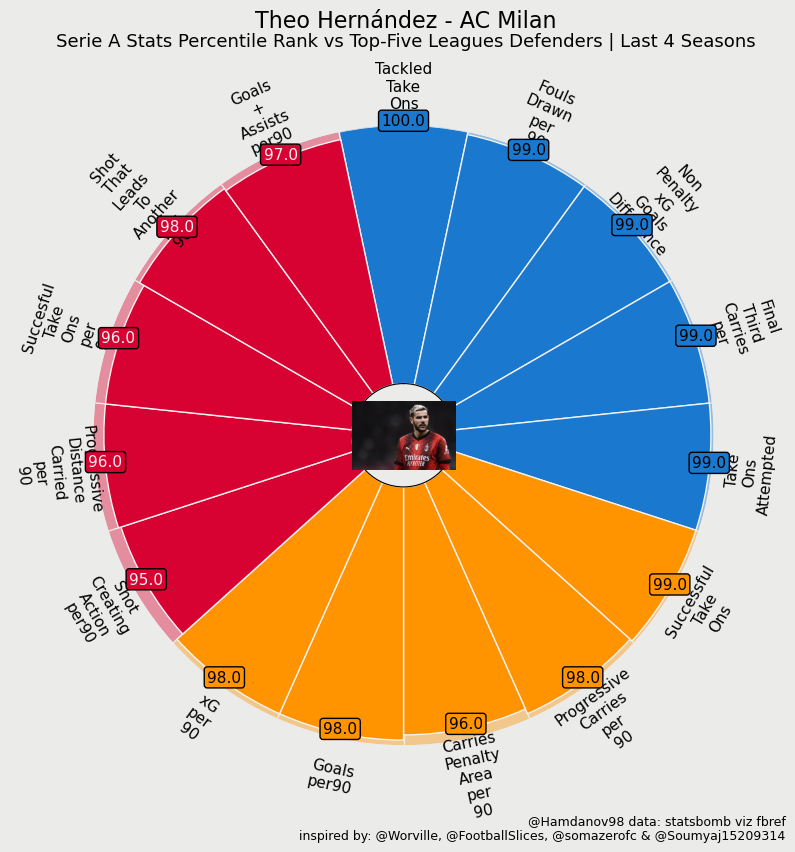

In [16]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    theo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Theo Hernández - AC Milan", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Theo_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


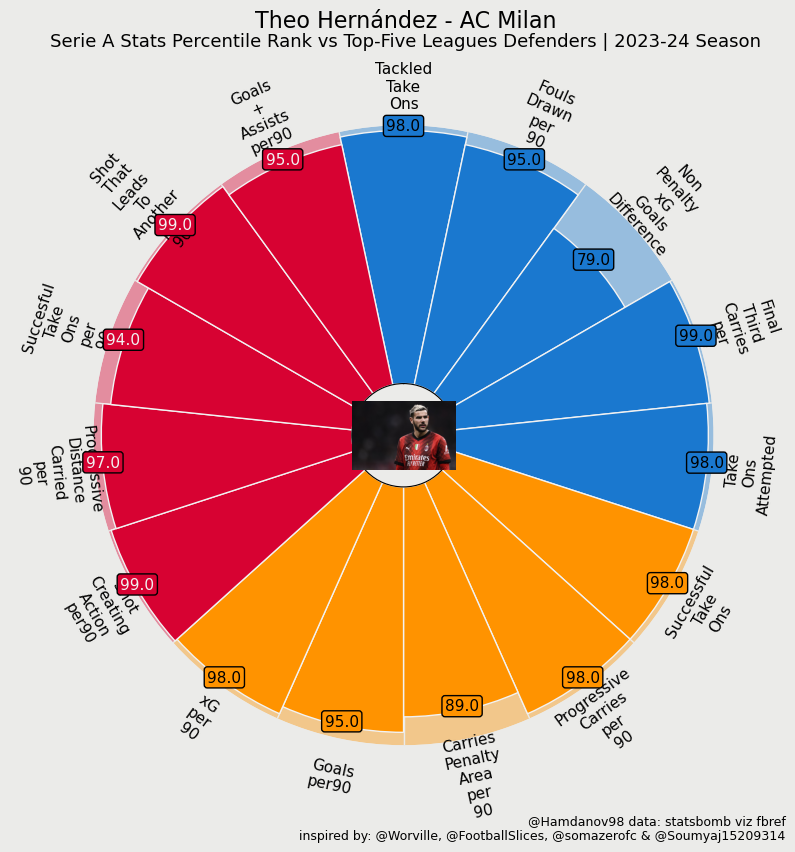

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    theo_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Theo Hernández - AC Milan", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Defenders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Theo_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [18]:
params = ['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Npxg_net', '1/3_Carries_per_90', 
          'Take_Ons_Attempted', 'Take_Ons_Succ', 'Progressive_Carries_per_90', 
          'Carries_Penalty_Area_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Distance_Carried_per_90', 'Take_Ons_Succ_per_90', 
          'Shot-Shot_per_90', 'G+A_per90']

In [19]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in defender_players.columns:
        defender_players[feature] = -defender_players[feature]
        player_2024[feature]=-player_2024[feature]

In [20]:
# Normalize data
numerical_defense_players = defender_players[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [21]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=defender_players.index)

In [22]:
# Get de Ligt's row and compute cosine similarity
theo_index = defender_players.index[defender_players['Player'] == 'Theo Hernández'][0]
theo_data = transformed_df.loc[theo_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=theo_index)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, theo_data).flatten()
transformed_df['similarity_to_theo'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_theo', ascending=False).index
top_similar_players = defender_players.loc[top_similar_players_indices]

In [24]:
# Visualize the results
defender_players['similarity_to_theo'] = transformed_df['similarity_to_theo']
defense_players_sorted = defender_players.sort_values(by='similarity_to_theo', ascending=False)
defense_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_theo
221,566,Destiny Udogie,it ITA,DF,Tottenham+Udinese,eng Premier League+it Serie A,0.0,2002.0,96.0,88.0,7572,84.1,0.12,0.24,0.12,0.24,0.12,0.22,0.12,0.22,247.0,113.0,46.00,105.0,43.00,53.64,2.63,13.48,24.40,16.98,2.48,53.64,2.94,1.34,1.25,29.83,201.06,105.70,2.95,2.06,0.83,-1.87,-1.15,30.74,4.83,2.61,0.27,1.97,0.09,0.20,0.14,0.13,1.97,0.21,0.00,0.01,0.04,0.01,0.00,2867.0,3455.0,83.00,40214.0,13495.0,1732.0,1930.0,90.00,969.0,1091.0,85.00,72.0,118.0,61.00,0.03,0.10,0.07,0.02,1.02,2.74,0.76,0.08,4.16,41.08,35.03,5.98,0.73,0.01,0.02,0.81,5.18,0.07,0.00,0.00,0.0,34.09,0.07,1.37,0.75,0.29,4.54,11.72,4.41,0.3,0.3,49.00,-0.19,-0.01,-0.01,-1.47,1.52,0.14,1.19,1.40,0.00,-0.02,5.94,0.79,-0.82,2.42,1.34,0.80,0.27,1.12,2.00,0.88,1.19,0.24,3.61,1.75,0.06,55.96,3,1,0,2,0,0,0.944134
33,82,Marcos Acuña,ar ARG,DF,Sevilla,es La Liga,0.0,1991.0,112.0,91.0,7794,86.6,0.07,0.18,0.07,0.18,0.04,0.17,0.04,0.17,202.0,121.0,59.90,73.0,36.14,77.48,2.51,22.79,34.45,21.25,0.98,77.48,2.34,1.40,0.84,42.21,211.43,120.59,2.43,1.97,0.27,-1.46,-1.06,49.03,4.88,2.97,0.22,1.94,0.69,0.16,0.09,0.06,1.94,0.13,0.08,0.00,0.01,0.00,0.00,4556.0,5884.0,77.43,84311.0,32337.0,2030.0,2240.0,90.88,1824.0,2225.0,81.98,600.0,1145.0,52.40,0.02,0.13,0.17,-0.03,1.57,3.95,1.56,0.89,4.69,67.94,55.78,12.01,2.19,0.08,0.88,6.07,8.45,1.36,0.19,0.98,0.0,52.61,0.15,1.17,0.00,0.19,0.00,7.52,0.00,2.3,2.3,47.68,-0.37,-0.03,-0.00,-1.54,1.51,0.05,0.74,1.48,0.00,-0.05,6.6

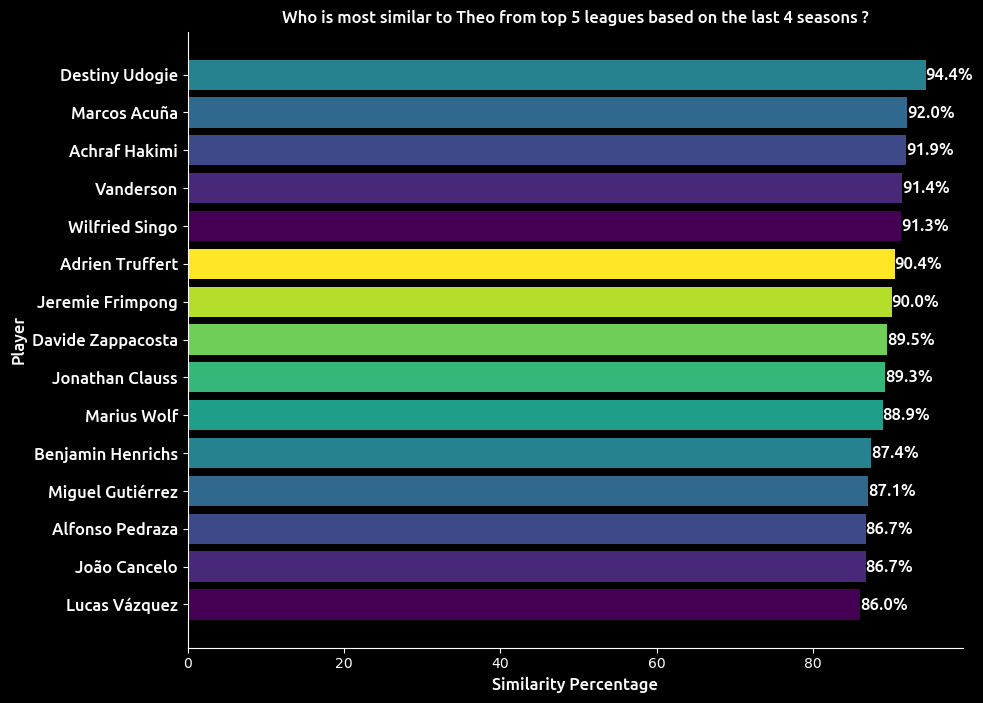

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')



# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_theo'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Theo from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [26]:
Truffert=defender_players[defender_players['Player']=='Adrien Truffert']
Truffert

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_theo
19,55,Adrien Truffert,fr FRA,DF,Rennes,fr Ligue 1,0.0,2001.0,117.0,89.0,7689,85.4,0.06,0.21,0.06,0.21,0.06,0.16,0.06,0.16,166.0,80.0,48.19,76.0,45.78,71.59,2.61,17.08,33.03,21.96,1.84,71.59,1.94,0.94,0.89,43.84,247.28,117.88,2.55,2.36,0.43,-1.49,-0.78,43.87,7.29,1.91,0.28,1.52,0.04,0.11,0.1,0.14,1.52,0.21,0.01,0.0,0.02,0.03,0.0,4155.0,5162.0,80.49,64432.0,19108.0,2083.0,2358.0,88.72,1667.0,2081.0,80.11,195.0,349.0,55.87,0.02,0.09,0.09,0.06,0.88,2.96,0.88,0.47,4.08,60.45,50.36,9.9,0.84,0.01,0.06,2.58,9.04,0.01,0.01,0.0,0.0,48.65,0.19,1.31,0.0,0.21,0.0,5.89,0.0,-0.2,-0.2,46.14,-0.16,-0.0,-0.0,-1.08,1.15,0.08,0.91,1.07,0.03,-0.01,4.94,1.01,-1.18,1.97,1.1,0.56,0.3,0.94,1.57,0.63,1.33,0.27,2.88,2.01,0.01,58.08,4,0,0,0,4,0,0.90429


In [27]:
params = ['Tackled_Take_Ons', 'Fouls_Drawn_per_90', 'Npxg_net', '1/3_Carries_per_90', 
          'Take_Ons_Attempted', 'Take_Ons_Succ', 'Progressive_Carries_per_90', 
          'Carries_Penalty_Area_per_90', 'Goals_per90', 'xG_per90', 'Shot_Creating_Action_per90',
          'Progressive_Distance_Carried_per_90', 'Take_Ons_Succ_per_90', 
          'Shot-Shot_per_90', 'G+A_per90']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Theo Hernandez's stats from the percentile ranks DataFrame
truffert_percentile_ranks = round(players_percentile_ranks.iloc[[19]],0)

# Print the percentile ranks for the player
truffert_percentile_ranks


,Tackled_Take_Ons,Fouls_Drawn_per_90,Npxg_net,1/3_Carries_per_90,Take_Ons_Attempted,Take_Ons_Succ,Progressive_Carries_per_90,Carries_Penalty_Area_per_90,Goals_per90,xG_per90,Shot_Creating_Action_per90,Progressive_Distance_Carried_per_90,Take_Ons_Succ_per_90,Shot-Shot_per_90,G+A_per90
19,95.0,84.0,53.0,96.0,95.0,94.0,89.0,89.0,66.0,68.0,74.0,69.0,87.0,74.0,89.0


In [28]:
truffert_percentile_ranks_list = truffert_percentile_ranks.values.flatten().tolist()
truffert_percentile_ranks_list

[95.0,
 84.0,
 53.0,
 96.0,
 95.0,
 94.0,
 89.0,
 89.0,
 66.0,
 68.0,
 74.0,
 69.0,
 87.0,
 74.0,
 89.0]

In [29]:
image_path = "Truffert.jpg"
fdj_cropped = Image.open(image_path)


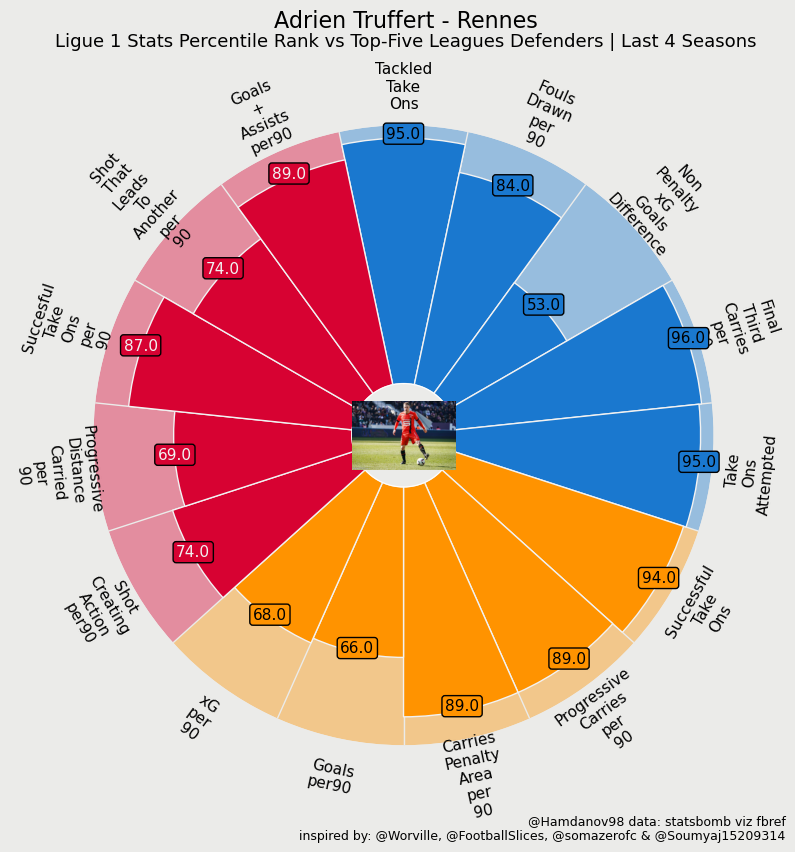

In [30]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    truffert_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Adrien Truffert - Rennes", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Truffert_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [31]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [32]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [33]:
# Get de Ligt's row and compute cosine similarity
theo_index = player_2024.index[player_2024['Player'] == 'Theo Hernández'][0]
theo_data = transformed_df.loc[theo_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=theo_index)

In [34]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, theo_data).flatten()
transformed_df['similarity_to_theo_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_theo_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [35]:
# Visualize the results
player_2024['similarity_to_theo_2024'] = transformed_df['similarity_to_theo_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_theo_2024', ascending=False)
player_2024_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_theo_2024
202,1091,Achraf Hakimi,ma MAR,DF,Paris S-G,fr Ligue 1,0.0,1998.0,25,20,1932,21.5,0.19,0.42,0.19,0.42,0.20,0.44,0.20,0.44,57.0,27.0,47.4,30.0,52.6,103.12,3.16,19.77,45.40,38.84,3.12,103.12,2.65,1.26,1.40,81.95,428.60,229.86,3.91,3.63,1.02,-1.53,-1.53,78.09,10.70,4.33,0.65,3.67,0.05,0.09,0.23,0.23,0.05,0.60,0.00,0.0,0.05,0.00,0.0,1712.0,1979.0,86.5,25356.0,8074.0,948.0,1030.0,92.0,613.0,696.0,88.1,77.0,125.0,61.6,0.23,0.24,0.20,-0.01,2.00,7.12,2.09,0.60,10.14,92.05,82.47,9.44,1.35,0.19,0.28,3.67,7.44,0.65,0.05,0.33,0.0,79.63,0.14,1.95,1.96,0.56,0.10,0.33,0.10,-0.2,-0.2,42.9,-0.14,-0.00,-0.00,-1.02,1.21,0.14,0.56,0.88,0.00,-0.05,6.60,0.42,-0.56,1.35,0.65,0.42,0.28,0.79,1.58,0.79,1.30,0.19,1.91,1.30,0.09,50.0,0.926831
504,2672,Vanderson,br BRA,DF,Monaco,fr Ligue 1,0.0,2001.0,20,20,1641,18.2,0.16,0.22,0.16,0.22,0.12,0.19,0.12,0.19,38.0,17.0,44.7,21.0,55.3,68.52,3.08,13.90,33.74,21.81,2.31,68.52,2.09,0.93,1.15,44.56,245.22,94.95,1.43,1.76,0.33,-1.43,-0.71,38.96,7.09,2.30,0.22,1.76,0.16,0.11,0.22,0.00,0.05,0.16,0.00,0.0,0.05,0.00,0.0,734.0,992.0,74.0,12230.0,4003.0,367.0,443.0,82.8,274.0,371.0,73.9,65.0,122.0,53.3,0.05,0.08,0.11,-0.02,1.04,2.58,1.32,0.16,3.90,54.51,46.21,8.19,0.82,0.11,0.38,2.64,7.25,0.11,0.00,0.05,0.0,40.33,0.11,1.37,1.65,0.55,0.10,0.30,0.07,0.9,0.9,32.4,-0.33,-0.05,-0.05,-2.47,0.93,0.05,1.92,2.25,0.00,-0.00,6.92,0.66,-1.37,3.30,1.10,1.65,0.55,1.76,3.85,2.09,1.59,0.11,5.22,2.03,0.05,45.7,0.886509
19,70,Trent Alexander-Arnold,eng ENG,DF,Liverpool,eng Premier League,0.0,1998.0,28,25,2155,23.9,

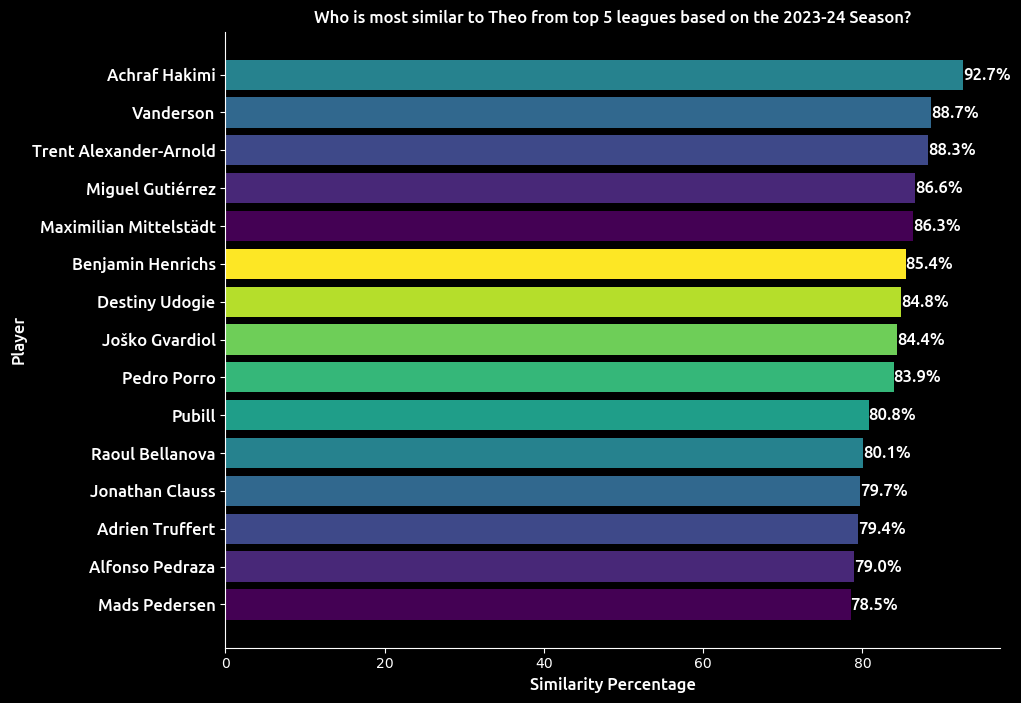

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_theo_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_theo_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_theo_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Theo from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [37]:
Miguel=player_2024[player_2024['Player']=='Miguel Gutiérrez']
Miguel

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_theo_2024
199,1075,Miguel Gutiérrez,es ESP,DF,Girona,es La Liga,0.0,2001.0,35,35,3032,33.7,0.06,0.27,0.06,0.27,0.08,0.3,0.08,0.3,63.0,25.0,39.7,30.0,47.6,64.75,3.44,18.69,27.69,18.99,1.81,64.75,1.87,0.74,0.89,37.92,206.35,91.28,2.2,2.05,0.45,-1.69,-0.95,42.34,5.46,2.37,0.39,2.08,0.03,0.06,0.18,0.0,0.03,0.39,0.0,0.0,0.0,0.0,0.0,1595.0,1855.0,86.0,24623.0,6547.0,860.0,916.0,93.9,590.0,685.0,86.1,96.0,146.0,65.8,0.21,0.22,0.2,-0.01,1.25,3.03,1.66,0.56,4.33,55.04,47.06,7.8,0.83,0.27,0.09,2.88,6.97,0.0,0.0,0.0,0.0,47.33,0.18,0.98,1.01,0.15,0.06,0.4,0.08,-0.8,-0.8,55.0,-0.12,-0.0,-0.0,-0.8,0.77,0.18,0.65,0.53,0.0,-0.06,6.02,0.65,-0.53,0.86,0.33,0.42,0.12,0.39,1.04,0.65,0.8,0.33,1.51,1.96,0.06,37.1,0.866403


In [38]:
import pandas as pd

params=['Progressive_Distance_Carried_per_90', 'Passes_TotDist',  'Passes_Total_Cmp',
        'Passes_Long_Cmp','Passes_Cmp_per_90', 'Passes_1/3_per_90',
        'Passes_Received_per_90','Passes_Attempted_per_90', 'Touches_Mid_3rd_per_90',
        'Touches_per_90', 'Carries_per_90','Passes_PrgDist', 
        'Switches_per_90', 'Progressive_Carries_per_90', 'Passes_Total_Cmp%']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
miguel_percentile_ranks = round(players_percentile_ranks.iloc[[199]],0)

# Print the percentile ranks for the player
miguel_percentile_ranks


,Progressive_Distance_Carried_per_90,Passes_TotDist,Passes_Total_Cmp,Passes_Long_Cmp,Passes_Cmp_per_90,Passes_1/3_per_90,Passes_Received_per_90,Passes_Attempted_per_90,Touches_Mid_3rd_per_90,Touches_per_90,Carries_per_90,Passes_PrgDist,Switches_per_90,Progressive_Carries_per_90,Passes_Total_Cmp%
199,45.0,79.0,88.0,64.0,62.0,51.0,62.0,55.0,43.0,51.0,57.0,57.0,17.0,83.0,70.0


In [39]:
miguel_percentile_ranks_list = miguel_percentile_ranks.values.flatten().tolist()

miguel_percentile_ranks_list

[45.0,
 79.0,
 88.0,
 64.0,
 62.0,
 51.0,
 62.0,
 55.0,
 43.0,
 51.0,
 57.0,
 57.0,
 17.0,
 83.0,
 70.0]

In [40]:
image_path = "Miguel.png"
fdj_cropped = Image.open(image_path)


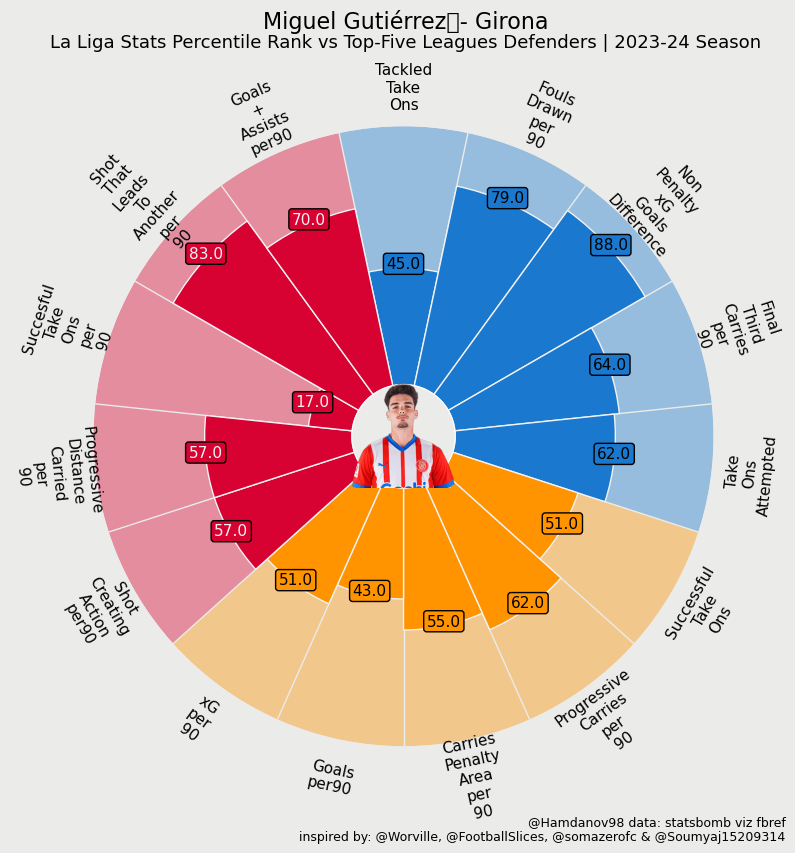

In [41]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    miguel_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Miguel Gutiérrez	- Girona", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Defenders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Miguel_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png
